### qwen2.5 分词

In [1]:
# qwen2.5 分词
from transformers import AutoTokenizer

# 直接使用HuggingFace模型ID在线加载
tokenizer = AutoTokenizer.from_pretrained(
    "./qwen2.5/"
)

#查看分词器的词表大小
print(tokenizer.vocab_size)
#查看分词器字节表示
a = tokenizer.encode("你好，世界")
b = "你好，世界".encode("utf-8")
s = tokenizer.tokenize("你好，世界")
s,b,a

151643


(['ä½łå¥½', 'ï¼Į', 'ä¸ĸçķĮ'],
 b'\xe4\xbd\xa0\xe5\xa5\xbd\xef\xbc\x8c\xe4\xb8\x96\xe7\x95\x8c',
 [108386, 3837, 99489])

### OpenAI tiktoken 分词
- https://platform.openai.com/tokenizer

In [ ]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")#gpt2, 'cl100k_base'
text = '伊朗再打以色列'
res = enc.encode(text)
print(len(res))
b1 = [enc.decode_single_token_bytes(i) for i in res]
b2 = [i.encode('utf-8') for i in text]
[enc.decode([i]) for i in res]
b1, b2

### ChatGLM分词

In [2]:
from transformers import AutoTokenizer
path = './chatGLM4/'
tokenizer_glm = AutoTokenizer.from_pretrained(path,trust_remote_code=True)
text = '伊朗再打以色列'
print(tokenizer_glm.tokenize(text))
print(tokenizer_glm(text))
text.encode('utf-8')

[b'\xe4\xbc\x8a\xe6\x9c\x97', b'\xe5\x86\x8d', b'\xe6\x89\x93', b'\xe4\xbb\xa5\xe8\x89\xb2\xe5\x88\x97']
{'input_ids': [151331, 151333, 107492, 98685, 98646, 110519], 'attention_mask': [1, 1, 1, 1, 1, 1], 'position_ids': [0, 1, 2, 3, 4, 5]}


b'\xe4\xbc\x8a\xe6\x9c\x97\xe5\x86\x8d\xe6\x89\x93\xe4\xbb\xa5\xe8\x89\xb2\xe5\x88\x97'

### Embedding

In [ ]:
import torch
embedding = torch.nn.Embedding(1000,64)
t1 = torch.tensor(600)#代表一个token, 1000-->64
embedding(t1).shape,embedding.weight.shape

(torch.Size([64]), torch.Size([1000, 64]))

### LayerNorm

In [17]:
# 
import torch
import torch.nn as nn

t = torch.tensor([[1, 2, 3]]).reshape(1, 1, 3).float()
ln = nn.LayerNorm(3,elementwise_affine=False)
t2 = ln(t)
print(t2)
mean = t[0][0].mean()
var = t[0][0].var(unbiased=False)#总体方差，有偏
(t[0][0] - mean) / torch.sqrt(var + 1e-5)

tensor([[[-1.2247,  0.0000,  1.2247]]])


tensor([-1.2247,  0.0000,  1.2247])

### 位置编码

$$
PE_{(pos,2i)} = sin(pos/10000^{\frac{2i}{d_{model}}})
$$
$$
PE_{(pos,2i+1)} = cos(pos/10000^{\frac{2i}{d_{model}}})
$$

### GELU


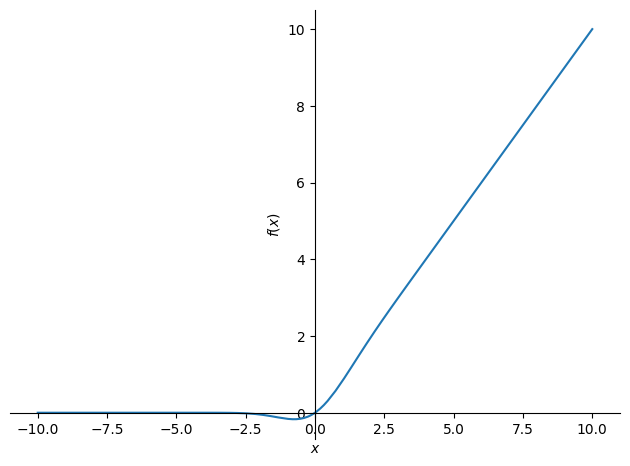

In [18]:
import sympy
x = sympy.symbols('x')
gelu =  0.5 * x * (1.0 + sympy.tanh(sympy.sqrt(2.0 / sympy.pi) * (x + 0.044715 * x**3)))
sympy.plot(gelu)

### QK QK为什么不一致

In [20]:
# QKV，使用q和q相乘
import torch
a = torch.randn(4, 8)
print(a)
s = a @ a.T
print(s)
torch.nn.functional.softmax(s,0)


tensor([[ 0.8161, -1.2876, -0.2348, -0.6623, -0.4647, -1.3142,  0.4187,  2.3720],
        [-0.5289,  0.1191,  1.3053, -0.5352, -0.1895,  0.7397, -1.8341, -0.0614],
        [-0.4639, -0.7047,  0.8893,  1.6376,  1.1723,  1.1662, -0.1725,  1.4269],
        [-0.4444,  0.4654,  0.0529, -1.1771, -0.8652, -0.2758, -0.7846, -1.6108]])
tensor([[10.5625, -2.3343,  0.4703, -3.5795],
        [-2.3343,  6.2349,  1.3151,  2.4872],
        [ 0.4703,  1.3151,  8.9846, -5.5014],
        [-3.5795,  2.4872, -5.5014,  5.8372]])


tensor([[9.9996e-01, 1.8414e-04, 2.0044e-04, 7.8583e-05],
        [2.5059e-06, 9.6987e-01, 4.6655e-04, 3.3893e-02],
        [4.1400e-05, 7.0811e-03, 9.9933e-01, 1.1500e-05],
        [7.2140e-07, 2.2863e-02, 5.1112e-07, 9.6602e-01]])

### softmax
- 为什么除以 $\sqrt(d_model)$
- 多头的原因
- 带温度的softmax

In [10]:
mean = 0
std = 1
t1 = torch.normal(mean=mean, std=std, size=(10,10))
t2 = t1 @ t1
t2.mean(),t2.var()

(tensor(0.0695), tensor(8.7190))

In [ ]:
softmax = torch.nn.Softmax(dim=0)
t1 = torch.tensor([1, 2, 3]).float()
t2 = torch.tensor([10, 20, 30]).float()
print(softmax(t1), softmax(t2))

In [12]:
softmax = torch.nn.Softmax(dim=0)
t = torch.tensor([-0.5,5,-1,0.01,0.3,0.2])
softmax(t)
t1 = t[0:3]
t2 = t[3:]
softmax(t),softmax(t1), softmax(t2)

(tensor([0.0040, 0.9702, 0.0024, 0.0066, 0.0088, 0.0080]),
 tensor([0.0041, 0.9935, 0.0025]),
 tensor([0.2820, 0.3769, 0.3410]))

In [22]:
import torch
import torch.nn.functional as F

def temperature_softmax(logits, temperature=1.0):
    # 调整 logits 的温度
    scaled_logits = logits / temperature
    # 应用 Softmax
    return F.softmax(scaled_logits, dim=-1)

# 示例
logits = torch.tensor([2.0, 1.0, 0.1])  # 示例输入
t1 = 0.5  # 温度参数
t2 = 1.0  # 温度参数

# 计算带温度的 Softmax
    
temperature_softmax(logits, t1),temperature_softmax(logits, t2)

(tensor([0.8638, 0.1169, 0.0193]), tensor([0.6590, 0.2424, 0.0986]))

In [ ]:
torch.triu(torch.ones(6,6), diagonal=1)